In [1]:
from preprocessing import *
from import_data import *
from plotting import *
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/sess2/'
bci_dir = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-03-10_14-09-51/'
col_names = ['Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir)
bci_files = get_files(bci_dir)

In [2]:
ssvep_files

['DataCollection/outputs/SSVEP/sess2/2023-03-10T14:06:15.830513_baseline.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:06:15.830513_metadata.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_10.00Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_10.80Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_11.60Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_12.40Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_13.20Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_14.00Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_14.80Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_15.60Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_8.40Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_9.20Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_

In [13]:
ssvep_files[3]

'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_10.80Hz.txt'

In [17]:
eeg_file = ssvep_files[3]
openbci_file = bci_files[1]

In [18]:
filt, Fs = process_eeg(eeg_file, col_names, openbci_file, low=6, high=32)

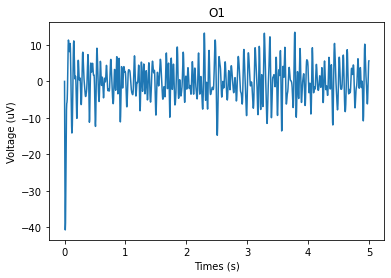

In [19]:
plot_channel(filt, 'O1',Fs)

In [20]:
power = power_spectrum(filt, Fs)

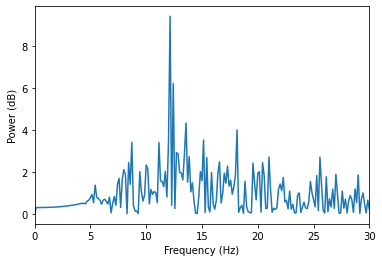

In [21]:
plot_power(power, 'O1', 30)